In [1]:
!git clone https://github.com/Char1iee/NBA_Odds_Analysis

fatal: destination path 'NBA_Odds_Analysis' already exists and is not an empty directory.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
import numpy as np

import keras
from keras import layers, Model

from keras.optimizers import Adam
from keras.layers import RNN, Dense, Input, SimpleRNN, Concatenate
from keras.callbacks import EarlyStopping

import tensorflow as tf

In [4]:
X = pd.read_csv("NBA_Odds_Analysis/inputs.csv")
Y = pd.read_csv("NBA_Odds_Analysis/outputs.csv")


In [5]:
X

,season,home/visitor,day,day_of_week,month,games_played,cumulative_wins,cumulative_win_rate,cumulative_score,average_score,...,team-LA Clippers,opponent-LA Clippers,team-Charlotte,opponent-Charlotte,team-Boston,opponent-Boston,team-Oklahoma City,opponent-Oklahoma City,team-Brooklyn,opponent-Brooklyn
0,0.0,0.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37099,1.0,0.0,0.500000,0.000000,0.000000,0.530864,0.338028,0.558140,0.502194,0.798339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37100,1.0,1.0,0.500000,0.000000,0.000000,0.518519,0.183099,0.309524,0.514002,0.836565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37101,1.0,1.0,0.500000,0.000000,0.000000,0.543210,0.267606,0.431818,0.524660,0.815097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37102,1.0,1.0,0.500000,0.000000,0.000000,0.543210,0.309859,0.500000,0.527795,0.819968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
Y

,moneyLine,total,spread,secondHalfTotal,score
0,0.671795,0.515528,0.523256,0.524390,0.975165
1,0.676410,0.354037,0.616279,0.365854,-0.829566
2,0.654872,0.354037,0.383721,0.365854,-0.679171
3,0.594872,0.236025,0.197674,0.268293,0.147997
4,0.712821,0.236025,0.802326,0.268293,-0.528777
...,...,...,...,...,...
37099,0.671795,0.596273,0.534884,0.548780,1.426347
37100,0.625641,0.751553,0.209302,0.829268,2.403910
37101,0.660513,0.596273,0.465116,0.548780,1.275953
37102,0.657692,0.763975,0.406977,0.853659,1.576742


In [7]:
I = {}
for col in X.columns:
  if col.startswith("team-"):
    team = col[5:]
    I[team] = []
    for i in range(X.shape[0]):
      if X[col][i] == 1:
        I[team].append(i)

In [8]:
print(I['Atlanta'])

[33, 73, 97, 118, 131, 183, 208, 256, 270, 309, 325, 375, 409, 428, 457, 506, 512, 548, 579, 606, 623, 658, 677, 721, 739, 779, 822, 870, 916, 951, 971, 1019, 1065, 1081, 1109, 1129, 1161, 1209, 1224, 1270, 1297, 1323, 1334, 1384, 1406, 1430, 1453, 1475, 1518, 1528, 1566, 1596, 1612, 1642, 1669, 1704, 1730, 1749, 1780, 1807, 1824, 1857, 1886, 1910, 1939, 1976, 1995, 2022, 2071, 2104, 2126, 2147, 2188, 2202, 2241, 2265, 2280, 2312, 2364, 2375, 2429, 2445, 2482, 2531, 2575, 2613, 2640, 2656, 2671, 2710, 2732, 2764, 2795, 2802, 2828, 2891, 2928, 2951, 2993, 3024, 3036, 3073, 3102, 3121, 3135, 3162, 3191, 3220, 3260, 3294, 3332, 3360, 3379, 3421, 3438, 3503, 3532, 3559, 3588, 3597, 3621, 3682, 3685, 3729, 3763, 3771, 3809, 3834, 3852, 3910, 3928, 3950, 4003, 4009, 4040, 4074, 4098, 4141, 4163, 4196, 4226, 4251, 4281, 4294, 4316, 4352, 4388, 4403, 4445, 4472, 4500, 4530, 4561, 4594, 4605, 4647, 4679, 4709, 4738, 4781, 4791, 4818, 4889, 4904, 4936, 4981, 5000, 5035, 5055, 5064, 5093, 5153, 5

In [9]:
df = pd.concat([X, Y], axis=1)

X_team = {}
for col in X.columns:
  if col.startswith("team-"):
    team = col[5:]
    prev_season = -1
    games = []
    X_team[team] = []
    for i in range(len(I[team])):
      if X['season'][I[team][i]] != prev_season:
        prev_season = X['season'][I[team][i]]
        games.clear()
      X_team[team].append(games.copy())
      games.append(df.iloc[I[team][i]])

In [10]:
df.head()

,season,home/visitor,day,day_of_week,month,games_played,cumulative_wins,cumulative_win_rate,cumulative_score,average_score,...,opponent-Boston,team-Oklahoma City,opponent-Oklahoma City,team-Brooklyn,opponent-Brooklyn,moneyLine,total,spread,secondHalfTotal,score
0,0.0,0.0,0.966667,0.166667,0.818182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.671795,0.515528,0.523256,0.524390,0.975165
1,0.0,1.0,0.966667,0.166667,0.818182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.676410,0.354037,0.616279,0.365854,-0.829566
2,0.0,0.0,0.966667,0.166667,0.818182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.654872,0.354037,0.383721,0.365854,-0.679171
3,0.0,1.0,0.966667,0.166667,0.818182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.594872,0.236025,0.197674,0.268293,0.147997
4,0.0,0.0,0.966667,0.166667,0.818182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.712821,0.236025,0.802326,0.268293,-0.528777


In [11]:
date_cols = ['season', 'day', 'day_of_week', 'month', 'sin_day', 'sin_day_of_week', 'sin_month']

In [12]:
# date info for current match
# x_date = Input(shape=(len(date_cols),), name="x_date")

seq_len = 5
x_total = Input(shape=(None, df.shape[1]), name="x_total")
x_team = x_total[:seq_len]
x_opponent = x_total[seq_len:]

# team's season history
# x_team = Input(shape=(None, df.shape[1]), name="x_team")
# x_team = Input(type_spec=tf.RaggedTensorSpec(shape=[None, None, df.shape[1]], dtype=tf.float64, ragged_rank=1))

# opponent's season history
# x_opponent = Input(shape=(None, df.shape[1]), name="x_opponent")
# x_opponent = Input(type_spec=tf.RaggedTensorSpec(shape=[None, None, df.shape[1]], dtype=tf.float64, ragged_rank=1))

In [13]:
rnn = SimpleRNN(16)

r_team = rnn(x_team)
r_opponent = rnn(x_opponent)

# x = Concatenate(axis=1)([x_date, r_team, r_opponent])
x = Concatenate(axis=0)([r_team, r_opponent])
x = Dense(32)(x)
x = Dense(16)(x)
x = Dense(Y.shape[1])(x)

In [14]:
# model = Model(inputs=[x_date, x_team, x_opponent], outputs=x, name="rnn_model")
model = Model(inputs=x_total, outputs=x, name="rnn_model")

In [15]:
model.summary()

Model: "rnn_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 x_total (InputLayer)        [(None, None, 85)]           0         []                            
                                                                                                  
 tf.__operators__.getitem (  (None, None, 85)             0         ['x_total[0][0]']             
 SlicingOpLambda)                                                                                 
                                                                                                  
 tf.__operators__.getitem_1  (None, None, 85)             0         ['x_total[0][0]']             
  (SlicingOpLambda)                                                                               
                                                                                          

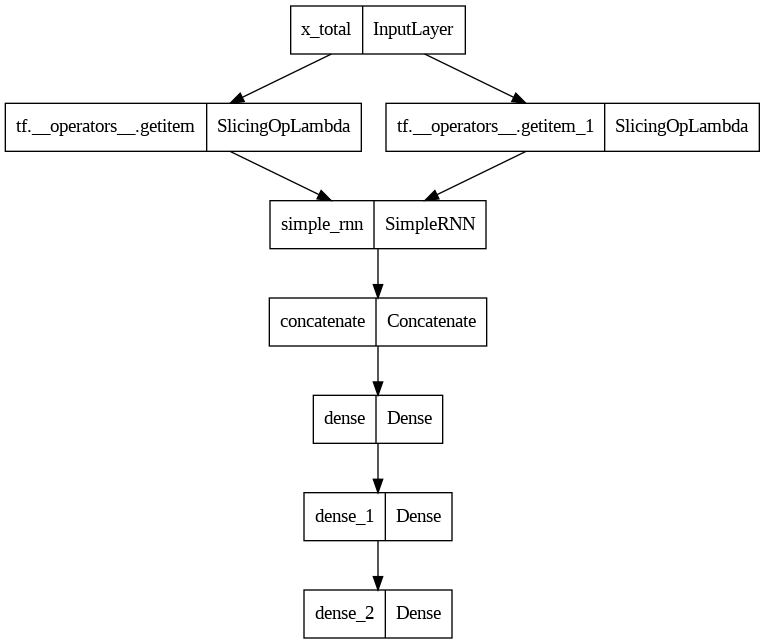

In [16]:
keras.utils.plot_model(model, "rnn.png")

In [17]:
op = Adam(learning_rate = 1e-4)
model.compile(optimizer = op, loss = 'mse')

In [18]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [19]:
X_date = []
X_self = []
X_opponent = []
X_rnn = []
for i in range(X.shape[0]):
  team = ""
  for col in X.columns:
    if col.startswith("team-") and X[col][i] == 1:
      team = col[5:]
  opponent = ""
  for col in X.columns:
    if col.startswith("opponent-") and X[col][i] == 1:
      opponent = col[9:]
  team_idx = min(np.searchsorted(I[team], i), len(X_team[team])-1)
  opponent_idx = min(np.searchsorted(I[opponent], i), len(X_team[opponent])-1)

  team_seq = np.array(X_team[team][team_idx]).reshape(-1,df.shape[1])
  opponent_seq = np.array(X_team[opponent][opponent_idx]).reshape(-1,df.shape[1])
  if (len(team_seq) < seq_len):
    team_seq = np.pad(team_seq, ((seq_len-len(X_team[team][team_idx]), 0), (0, 0)), 'constant', constant_values=((0,0),(0,0)))
  else:
    team_seq = team_seq[-seq_len:]
  if (len(opponent_seq) < seq_len):
    opponent_seq = np.pad(opponent_seq, ((seq_len-len(X_team[opponent][opponent_idx]), 0), (0, 0)), 'constant', constant_values=((0,0),(0,0)))
  else:
    opponent_seq = opponent_seq[-seq_len:]
  X_rnn.append(np.concatenate([team_seq, opponent_seq], axis=0))

  # if (len(X_team[team][team_idx]) < seq_len or len(X_team[opponent][opponent_idx]) < seq_len):
  #   print(np.array(X_team[team][team_idx]).shape)

  #   X_rnn.append( + )
  #   # Y.drop([i], inplace=True)
  # else:
  #   X_rnn.append(X_team[team][team_idx][-seq_len:] + X_team[opponent][opponent_idx][-seq_len:])
  #   X_date.append(X.iloc[i][date_cols])
  #   X_self.append(X_team[team][team_idx][-seq_len:])
  #   X_opponent.append(X_team[opponent][opponent_idx][-seq_len:])

In [20]:
X_date = np.asarray(X_date).astype('float64')
for i in range(len(X_self)):
  X_self[i] = np.array(X_self[i])
  X_opponent[i] = np.array(X_opponent[i])
# X_self = np.asarray(X_self)
# X_opponent = np.asarray(X_opponent)
X_rnn = np.asarray(X_rnn).astype('float64')
Y = np.asarray(Y).astype('float64')

In [21]:
print(X_rnn.shape)

(37104, 10, 85)


In [22]:
x_train, x_test, y_train, y_test = train_test_split(X_rnn, Y, test_size = 0.3, shuffle = False)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, shuffle = False)

In [23]:
# x_date_train, x_date_test, x_self_train, x_self_test = train_test_split(X_date, X_self, test_size = 0.3, shuffle = False)
# x_date_train, x_date_val, x_self_train, x_self_val = train_test_split(x_date_train, x_self_train, test_size = 0.2, shuffle = False)

In [24]:
# x_opponent_train, x_opponent_test, y_train, y_test = train_test_split(X_opponent, Y, test_size = 0.3, shuffle = False)
# x_opponent_train, x_opponent_val, y_train, y_val = train_test_split(x_opponent_train, y_train, test_size = 0.2, shuffle = False)

In [25]:
# x_train = {"x_team":x_self_train, "x_opponent":x_opponent_train}
# x_val = {"x_team":x_self_val, "x_opponent":x_opponent_val}
# x_test = {"x_team":x_self_test, "x_opponent":x_opponent_test}

In [26]:
def feed(x, y):
  # idx = (np.random.rand(100) * len(x)).astype(int)
  while True:
    i = int(np.random.rand(1)[0] * len(x))
    # print({"x_date":[x[i][0]], "x_team":[x[i][1]], "x_opponent":[x[i][2]]}, [y[i]])
    yield {"x_team":np.array([x[i][0]]), "x_opponent":np.array([x[i][1]])}, np.array([y[i]])

In [27]:
# , validation_data = feed(x_val, y_val), callbacks = [early_stopping], validation_steps=100, validation_batch_size=1

In [28]:
history = model.fit(x_train, y_train, epochs = 100, validation_data=(x_val, y_val), callbacks=[early_stopping], batch_size=32, shuffle=False)

Epoch 1/100
650/650 [==============================] - 6s 7ms/step - loss: 0.2704 - val_loss: 0.2016
Epoch 2/100
650/650 [==============================] - 5s 7ms/step - loss: 0.1753 - val_loss: 0.1808
Epoch 3/100
650/650 [==============================] - 4s 6ms/step - loss: 0.1647 - val_loss: 0.1721
Epoch 4/100
650/650 [==============================] - 4s 7ms/step - loss: 0.1585 - val_loss: 0.1667
Epoch 5/100
650/650 [==============================] - 5s 7ms/step - loss: 0.1537 - val_loss: 0.1625
Epoch 6/100
650/650 [==============================] - 4s 6ms/step - loss: 0.1494 - val_loss: 0.1591
Epoch 7/100
650/650 [==============================] - 4s 7ms/step - loss: 0.1457 - val_loss: 0.1568
Epoch 8/100
650/650 [==============================] - 4s 7ms/step - loss: 0.1430 - val_loss: 0.1554
Epoch 9/100
650/650 [==============================] - 4s 6ms/step - loss: 0.1412 - val_loss: 0.1544
Epoch 10/100
650/650 [==============================] - 4s 6ms/step - loss: 0.1398 - val_lo

In [29]:
# history = model.fit(x=x_train, y=Y, epochs = 100, steps_per_epoch = 100, batch_size=1, validation_data = (x_val, y_val), callbacks = [early_stopping], shuffle=False)

In [30]:
# def feedx(x):
#   # idx = (np.random.rand(100) * len(x)).astype(int)
#   for i in range(len(x)):
#     # print({"x_date":[x[i][0]], "x_team":[x[i][1]], "x_opponent":[x[i][2]]}, [y[i]])
#     yield {"x_date":np.array([x[i][0]]), "x_team":np.array([x[i][1]]), "x_opponent":np.array([x[i][2]])}

In [31]:
# y_pred_train = model.predict(feedx(x_train))
# y_pred_val = model.predict(feedx(x_val))
# y_pred_test = model.predict(feedx(x_test))

In [32]:
# def print_mse(y_true, yhat):
#     for i in range(Y.shape[1]):
#         print("MSE:")
#         print(f"{mean_squared_error(y_true[:, i], yhat[:, i])}")

In [33]:
# print_mse(y_train, y_pred_train)

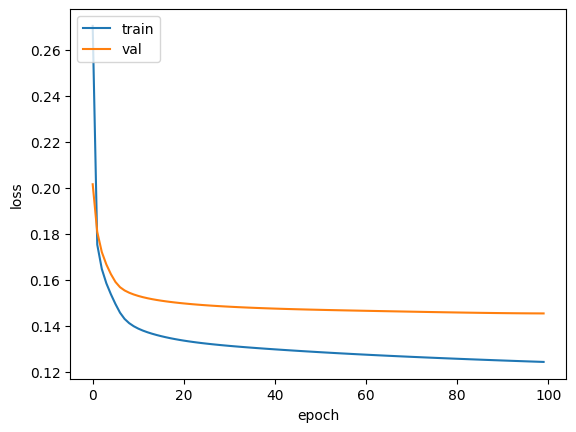

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [35]:
y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)
y_pred_test = model.predict(x_test)

348/348 [==============================] - 1s 2ms/step


In [36]:
def print_mse(y_true, yhat):
    for i in range(Y.shape[1]):
        print("MSE:")
        print(f"{mean_squared_error(y_true[:, i], yhat[:, i])}")

In [37]:
print_mse(y_train, y_pred_train)

MSE:
0.0006455434239436681
MSE:
0.004584128963999174
MSE:
0.010778333798858388
MSE:
0.00615887574453153
MSE:
0.6001948523669929


In [38]:
print_mse(y_val, y_pred_val)

MSE:
0.0012091844844974921
MSE:
0.005523536098904471
MSE:
0.011352311781607864
MSE:
0.008232111834786898
MSE:
0.7005677795229245


In [39]:
print_mse(y_test, y_pred_test)

MSE:
0.0009598851499043134
MSE:
0.012354843107194915
MSE:
0.015524530720840105
MSE:
0.012587675438438351
MSE:
0.7845015845808533
